## Análisis Exploratorio de Datos (EDA)

Estaremo realizando una exploración y análisis inicial del conjunto de datos cleaned_dataset. Este archivo fue almacenado en GitHub para facilitar el acceso y la colaboración.

#### Importar librerías

In [22]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código.
from wordcloud import WordCloud
from collections import Counter

#### Carga del archivo

In [2]:
url = 'https://raw.githubusercontent.com/JohannaRangel/ML_MarketAnalysis-AutomotrizChina/main/data/cleaned_dataset.csv'

try:
    cars = pd.read_csv(url, encoding='utf-8')
    print("El archivo se abrió correctamente con UTF-8.")
    cars.head()
except UnicodeDecodeError:
    print("Error: No se pudo abrir el archivo con UTF-8. Intenta con otra codificación.")

El archivo se abrió correctamente con UTF-8.


#### Vista previa rápida de los primeros registros

In [3]:
cars.head()

,car_id,marca,modelo,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,clasificacion_precio,calificacion_riesgo
0,1,alfa romeo,giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,Extremadamente Riesgoso
1,2,alfa romeo,stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,Extremadamente Riesgoso
2,3,alfa romeo,quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,Riesgoso
3,4,audi,a6,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,0,Muy Riesgoso
4,5,audi,a6,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,Muy Riesgoso


#### Estadísticas descriptivas del conjunto de datos

In [4]:
print("-------------------------------------------------")
print("\nEstadísticas descriptivas del conjunto de datos")
print("-------------------------------------------------")
print(cars.describe())

-------------------------------------------------

Estadísticas descriptivas del conjunto de datos
-------------------------------------------------
           car_id  door_number  wheel_base  car_length   car_width  \
count  205.000000   205.000000  205.000000  205.000000  205.000000   
mean   103.000000     3.121951   98.756585  174.049268   65.907805   
std     59.322565     0.994966    6.021776   12.337289    2.145204   
min      1.000000     2.000000   86.600000  141.100000   60.300000   
25%     52.000000     2.000000   94.500000  166.300000   64.100000   
50%    103.000000     4.000000   97.000000  173.200000   65.500000   
75%    154.000000     4.000000  102.400000  183.100000   66.900000   
max    205.000000     4.000000  120.900000  208.100000   72.300000   

       car_height  curb_weight  cylinder_number  engine_size  bore_ratio  \
count  205.000000   205.000000       205.000000   205.000000  205.000000   
mean    53.724878  2555.565854         4.419512   126.907317    3.32

#### Distribución estadística de las variables numéricas

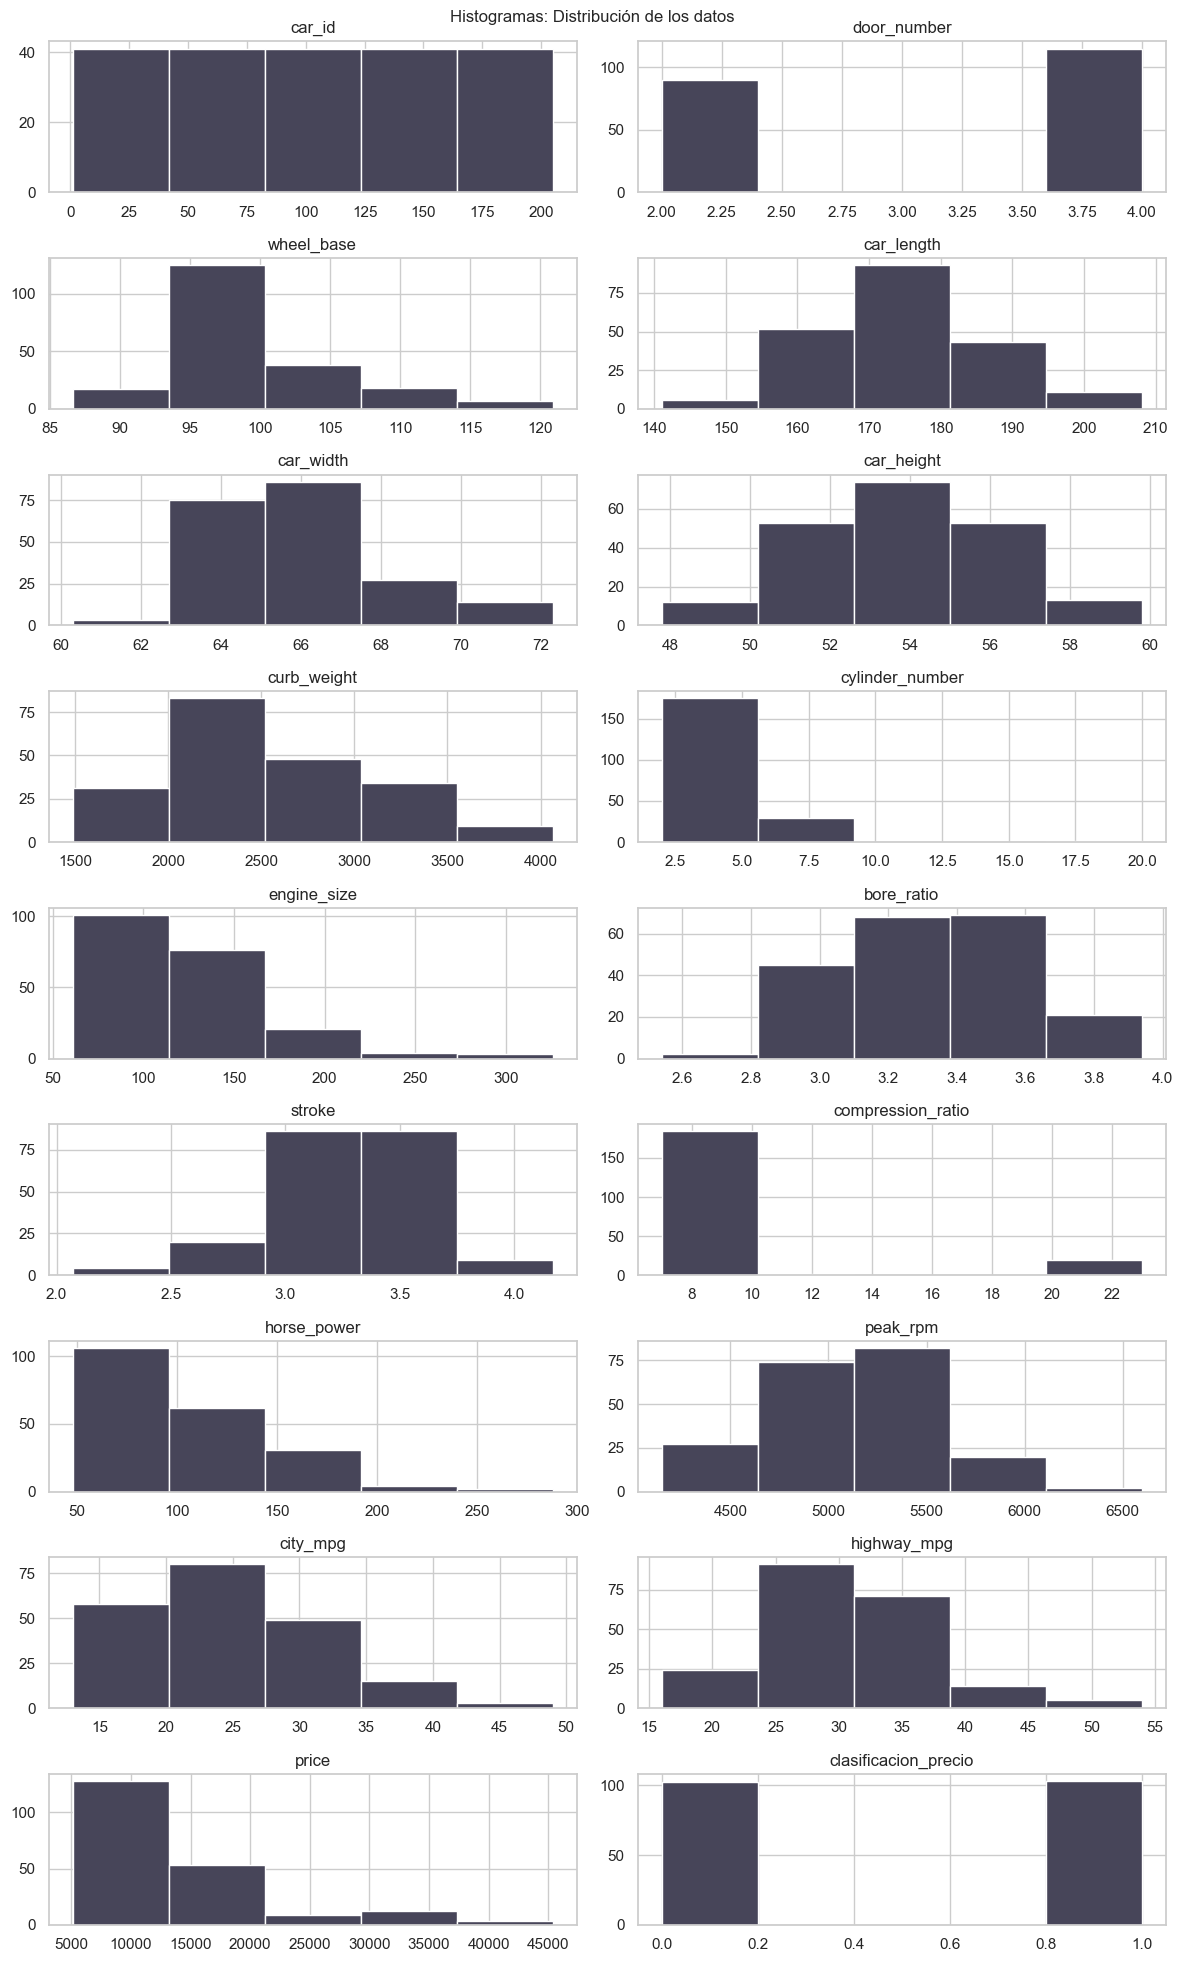

In [54]:
# Define la figura y los ejes para subgráficos
fig, axes = plt.subplots(9, 2, figsize=(12, 20))
fig.suptitle("Histogramas: Distribución de los datos", fontsize=12)

# Itera sobre las columnas numéricas y crea histogramas en los subgráficos correspondientes
for i, (col, ax) in enumerate(zip(cars.select_dtypes(include=np.number).columns, axes.flatten())):
    cars[col].hist(ax=ax, bins=5, color='#474559')
    ax.set_title(col)

# Ajusta la disposición
plt.tight_layout()
plt.show()

#### Distribución de Variables Categóricas

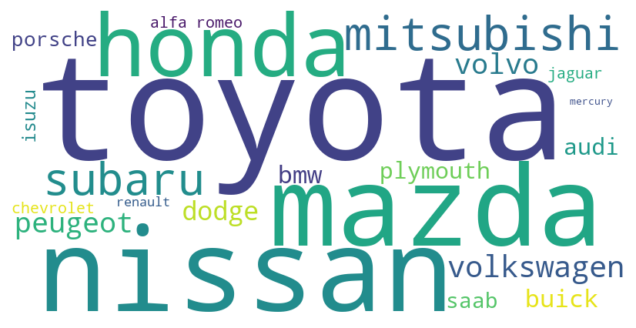

In [12]:
# Contar la frecuencia de cada marca
marca_counts = Counter(cars['marca'].astype(str).tolist())

# Crear una función para generar nubes de palabras con frecuencia
def generate_wordcloud_with_frequency(text_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text_counts)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generar nube de palabras para la columna 'marca'
generate_wordcloud_with_frequency(marca_counts)


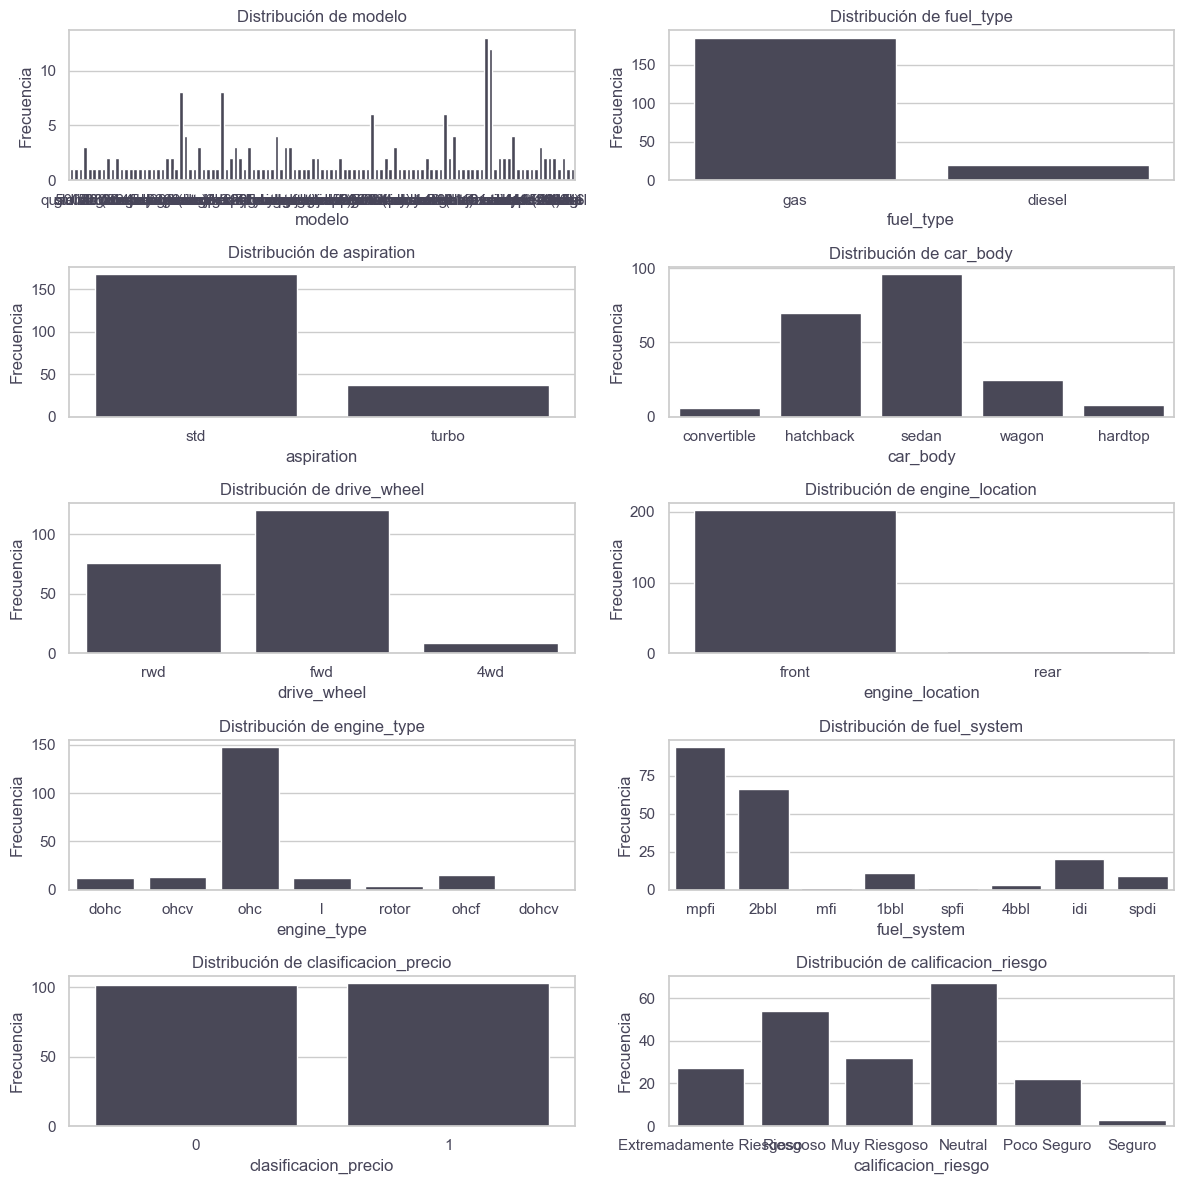

In [53]:
# Establecer el color principal
color_principal = '#474559'

# Lista de variables categóricas que deseas visualizar
variables_categoricas = ['modelo', 'fuel_type', 'aspiration', 'car_body', 
                         'drive_wheel', 'engine_location', 'engine_type',
                         'fuel_system', 'clasificacion_precio', 'calificacion_riesgo']

# Establecer el fondo de los gráficos
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Iterar sobre las variables categóricas y generar gráficos
for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(5, 2, i)  # Cambia el número de subgráficos según sea necesario
    sns.countplot(x=variable, data=cars, color=color_principal)
    plt.title(f'Distribución de {variable}', color=color_principal)
    plt.xlabel(variable, color=color_principal)
    plt.ylabel('Frecuencia', color=color_principal)
    plt.tick_params(axis='x', labelcolor=color_principal)
    plt.tick_params(axis='y', labelcolor=color_principal)

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()


#### Matriz de Correlación

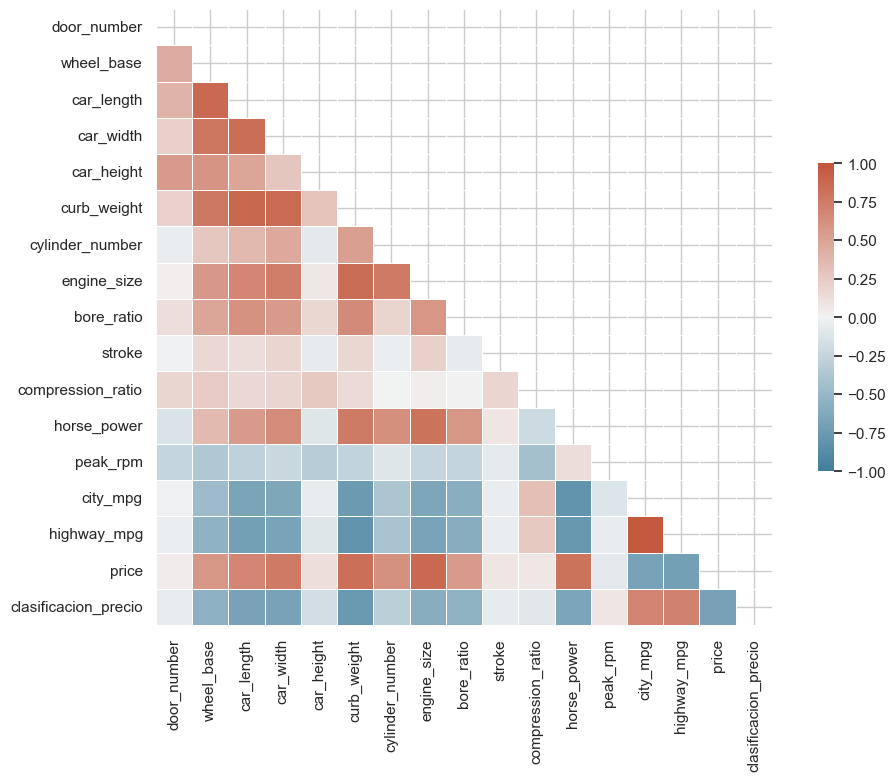

In [44]:
# Excluir la columna 'car_id'
numeric_columns = cars.drop('car_id', axis=1).select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el estilo de la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crear la figura de matplotlib
plt.figure(figsize=(12, 8))

# Especificar límites para la barra de color
vmin, vmax = -1, 1

# Crear el heatmap con seaborn
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Mostrar el gráfico
plt.show()
